# Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

# Importing Images

### Copy Right

In [ ]:

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("plameneduardo/sarscov2-ctscan-dataset")

# print("Path to dataset files:", path)

## Importing Data

In [2]:
IMG_SIZE = (64, 64)  # Smaller size can give you the ability to accelerate the image processing
DATASET_PATH = "Images"

# Importing Images
def load_data():
    images, labels = [], []
    categories = ["COVID", "non-COVID"]
    
    for category in categories:
        category_path = os.path.join(DATASET_PATH, category)
        label = 1 if category == "COVID" else 0  # COVID: 1, NonCOVID: 0
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img.flatten())  # Flatten the image to a 1D array
                labels.append(label)
    
    return np.array(images), np.array(labels)

# Loading data
X, Y = load_data()
print("Shape of data:", X.shape)

Shape of data: (2480, 4096)


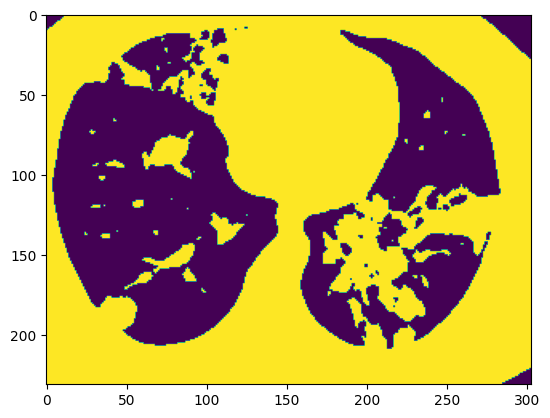

In [ ]:
# testin the threshold, the matplotlib turns RGB into BGR, because of that the photo is in anormal colors
img = cv2.imread('Images/COVID/Covid (30).png')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
plt.imshow(img)

In [3]:
# Splitting data into train and test
x_train_m, x_test_m, y_train_m,y_test_m = train_test_split(X, Y, test_size= 0.15)

# Machine Learning Models

## Machine learning RandomForest Model

In [40]:
Precision = []
Recall =[]
F1 = []
AUC = []

cross validation score: [0.75050302 0.87096774 0.91935484 0.80040323 0.72983871]
mean accuracy: 0.8142135068475367
standars deviation: 0.07161647785453083

random forest accuracy : 0.900804289544236
classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       186
           1       0.95      0.84      0.90       187

    accuracy                           0.90       373
   macro avg       0.91      0.90      0.90       373
weighted avg       0.91      0.90      0.90       373





<Figure size 640x480 with 0 Axes>

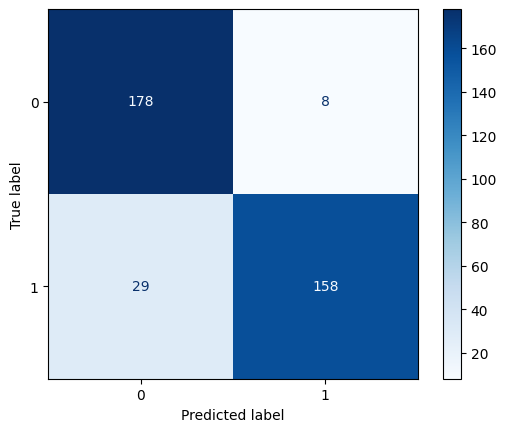

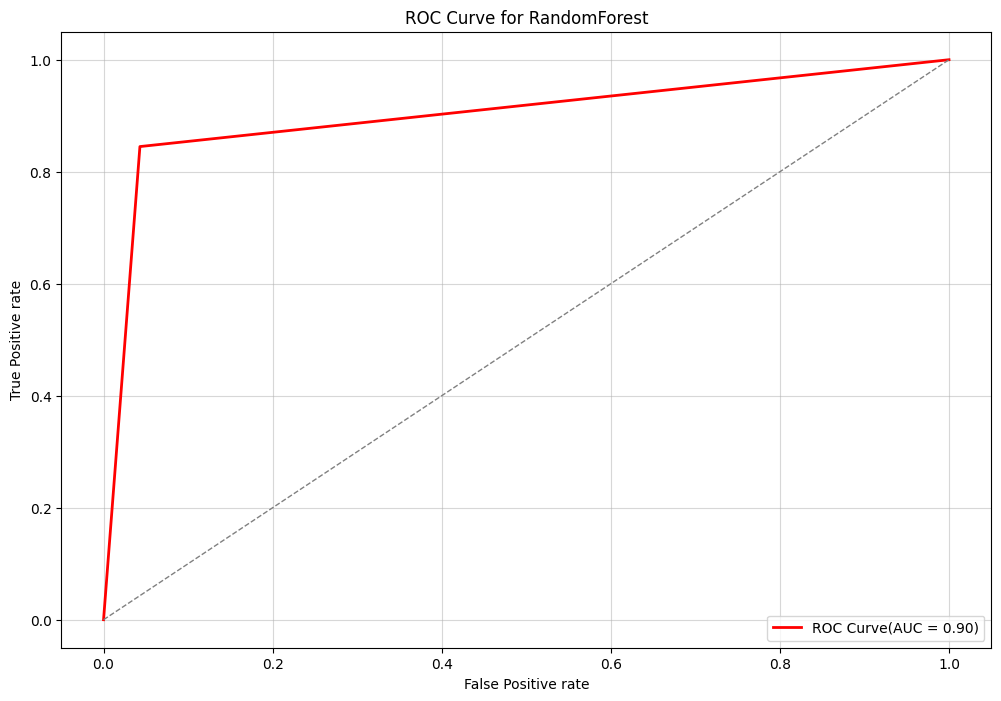

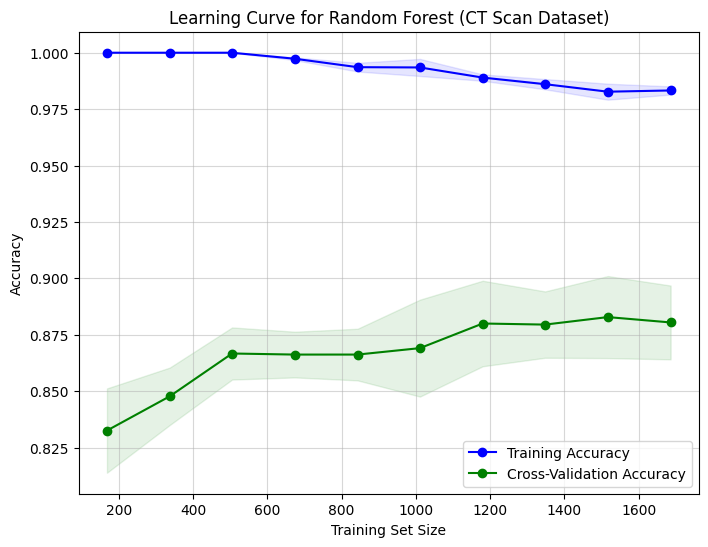

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=80, max_depth= 10, random_state= 42) # Defining model
scores_random_forest = cross_val_score(random_forest_model, X,Y, cv=5, scoring= 'accuracy')
print(f"cross validation score: {scores_random_forest}")
print(f"mean accuracy: {scores_random_forest.mean()}")
print(f"standars deviation: {scores_random_forest.std()}")
print()
# Training Model
random_forest_model.fit(x_train_m, y_train_m)
# Predict values
RandomForest_prediction = random_forest_model.predict(x_test_m)
# some basic statistical informations
print(f"random forest accuracy : {accuracy_score(y_test_m, RandomForest_prediction)}")
print(f"classification report:\n {classification_report(y_test_m, RandomForest_prediction)}")
print()
# Visualizing the Confusion Matrix
cm = confusion_matrix(y_test_m, RandomForest_prediction, labels= random_forest_model.classes_)
display_matrix = ConfusionMatrixDisplay(confusion_matrix= cm)
# Saving the Confusion Matrix
plt.savefig('Statistics\\Confusion matrix for randomForest.png', format= 'png')
display_matrix.plot(cmap="Blues")
print()
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_m, RandomForest_prediction)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\ROC curve RandomForest.png', format= 'png')
plt.show()
print()
# Plotting the learning curve
train_sizes, train_scores, test_scores =learning_curve(random_forest_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis= 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning curve RandomForest.png', format= 'png')
plt.show()

## Machine learning SVM Model

cross validation score: [0.722334   0.63709677 0.64516129 0.68346774 0.67540323]
mean accuracy: 0.6726926072564419
standars deviation: 0.030373527937589854

Acuuracy of the SVM model : 0.7667560321715817
Classification report :               precision    recall  f1-score   support

           0       0.77      0.75      0.76       186
           1       0.76      0.78      0.77       187

    accuracy                           0.77       373
   macro avg       0.77      0.77      0.77       373
weighted avg       0.77      0.77      0.77       373





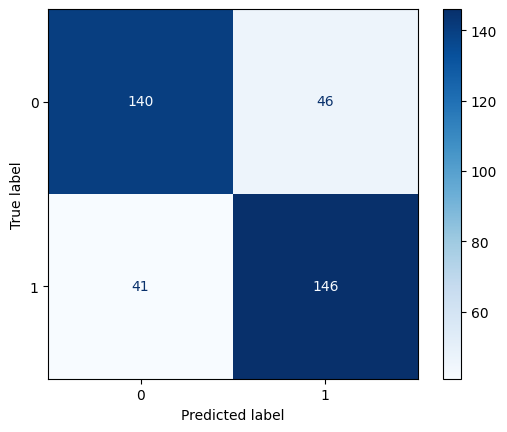

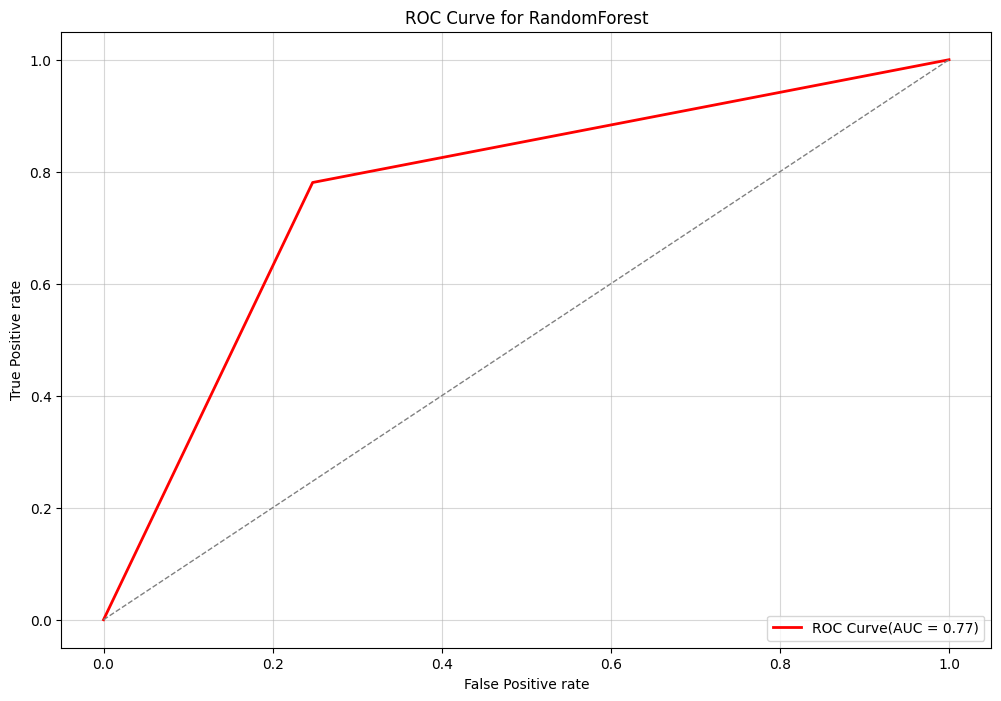

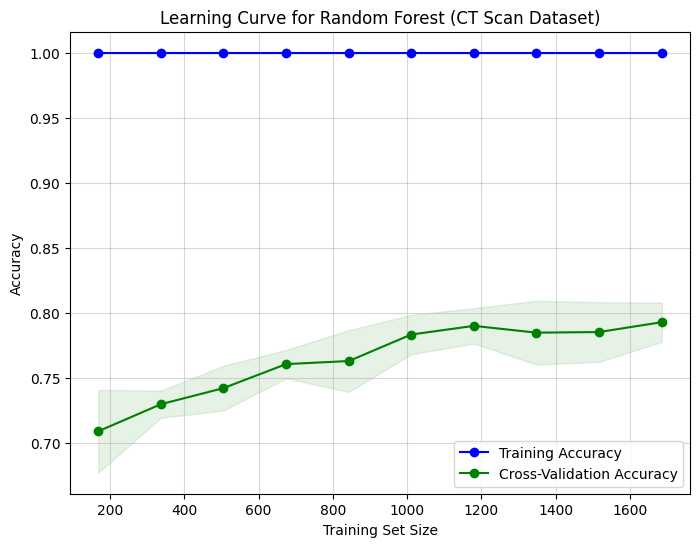

In [ ]:
SVM_model = SVC(kernel= 'linear', random_state= 42)
scores_SVM = cross_val_score(SVM_model, X,Y, cv=5, scoring= 'accuracy')
print(f"cross validation score: {scores_SVM}")
print(f"mean accuracy: {scores_SVM.mean()}")
print(f"standars deviation: {scores_SVM.std()}")
print()
SVM_model.fit(x_train_m, y_train_m)
SVM_prediction = SVM_model.predict(x_test_m)
print(f"Acuuracy of the SVM model : {accuracy_score(y_test_m, SVM_prediction)}")
print(f"Classification report : {classification_report(y_test_m, SVM_prediction)}")
print()
cm_svm = confusion_matrix(y_test_m, SVM_prediction, labels= SVM_model.classes_)
display_matrix_svm = ConfusionMatrixDisplay(confusion_matrix= cm_svm)
#plt.savefig('Statistics\\Confusion matrix for SVM.png', format= 'png')
display_matrix_svm.plot(cmap="Blues")
print()
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_m, SVM_prediction)
auc_score_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(12, 8))
plt.plot(fpr_svm, tpr_svm, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_svm:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\ROC Curve SVM.png', format= 'png')
plt.show()
print()
train_sizes_svm, train_scores_svm, test_scores_svm =learning_curve(SVM_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_svm = np.mean(train_scores_svm, axis= 1)
train_std_svm = np.std(train_scores_svm, axis = 1)
test_mean_svm = np.mean(test_scores_svm, axis = 1)
test_std_svm = np.std(test_scores_svm, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_svm, train_mean_svm, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_svm, train_mean_svm - train_std_svm, train_mean_svm + train_std_svm, color="blue", alpha=0.1)

plt.plot(train_sizes_svm, test_mean_svm, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_svm, test_mean_svm - test_std_svm, test_mean_svm + test_std_svm, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve SVM.png', format= 'png')
plt.show()


## Machine learning Logistic Regression Model

Cross validation scores:[0.69014085 0.6108871  0.62096774 0.7016129  0.66733871]
Mean accuracy:  0.6581894593366652
standard deiation : 0.03636802183672758

Acuuracy of the logistic regression model : 0.7721179624664879
Classification report for logistic regression model:               precision    recall  f1-score   support

           0       0.76      0.78      0.77       186
           1       0.78      0.76      0.77       187

    accuracy                           0.77       373
   macro avg       0.77      0.77      0.77       373
weighted avg       0.77      0.77      0.77       373





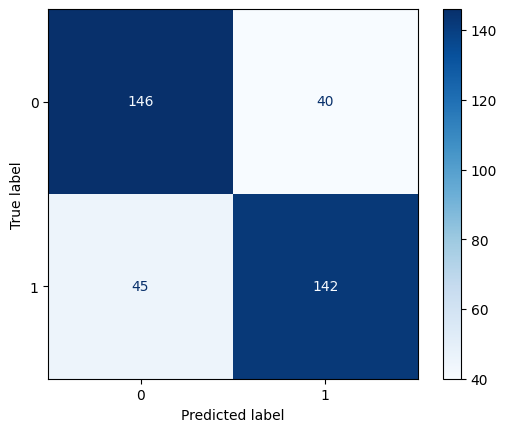

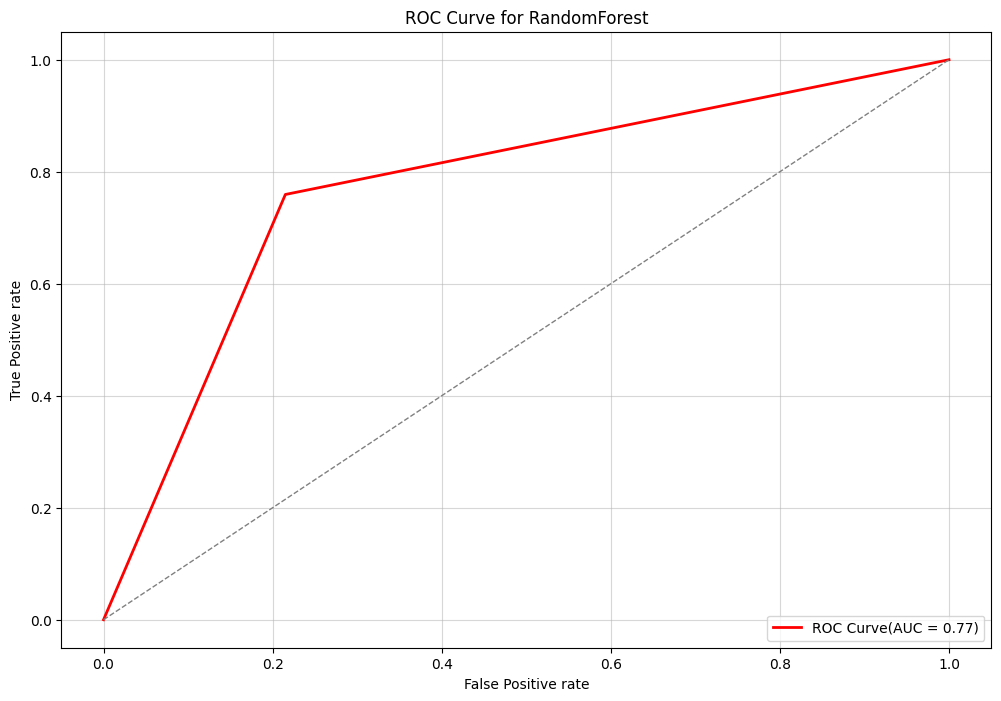

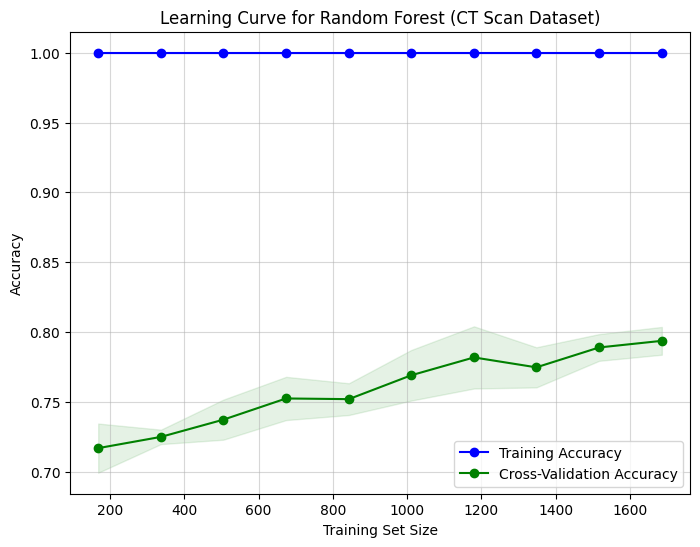

In [ ]:
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000,random_state= 42)
Logistic_scores = cross_val_score(logistic_regression_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{Logistic_scores}")
print(f"Mean accuracy:  {Logistic_scores.mean()}")
print(f"standard deiation : {Logistic_scores.std()}")
print()
logistic_regression_model.fit(x_train_m, y_train_m)
logistic_regression_prediction = logistic_regression_model.predict(x_test_m)
print(f"Acuuracy of the logistic regression model : {accuracy_score(y_test_m, logistic_regression_prediction)}")
print(f"Classification report for logistic regression model: {classification_report(y_test_m, logistic_regression_prediction)}")
print()
cm_logistic = confusion_matrix(y_test_m, logistic_regression_prediction, labels= logistic_regression_model.classes_)
display_matrix_logistic = ConfusionMatrixDisplay(confusion_matrix= cm_logistic)
display_matrix_logistic.plot(cmap="Blues")
print()
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_m, logistic_regression_prediction)
auc_score_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(12, 8))
plt.plot(fpr_logistic, tpr_logistic, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_logistic:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve Logistic.png', format= 'png')
plt.show()
print()
train_sizes_logistic, train_scores_logistic, test_scores_logistic =learning_curve(logistic_regression_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_logistic = np.mean(train_scores_logistic, axis= 1)
train_std_logistic = np.std(train_scores_logistic, axis = 1)
test_mean_logistic = np.mean(test_scores_logistic, axis = 1)
test_std_logistic = np.std(test_scores_logistic, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_logistic, train_mean_logistic, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_logistic, train_mean_logistic - train_std_logistic, train_mean_logistic + train_std_logistic, color="blue", alpha=0.1)

plt.plot(train_sizes_logistic, test_mean_logistic, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_logistic, test_mean_logistic - test_std_logistic, test_mean_logistic + test_std_logistic, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve Logistic.png', format= 'png')
plt.show()


## Machine learning KNeighbors Model

Cross validation scores:[0.67404427 0.55846774 0.65120968 0.62298387 0.62298387]
Mean accuracy:  0.6259378853767769
standard deiation : 0.03878803926173986

Acuuracy of the KNeighbors model : 0.8900804289544236
Classification report for KNeighbors model:               precision    recall  f1-score   support

           0       0.84      0.96      0.90       186
           1       0.95      0.82      0.88       187

    accuracy                           0.89       373
   macro avg       0.90      0.89      0.89       373
weighted avg       0.90      0.89      0.89       373





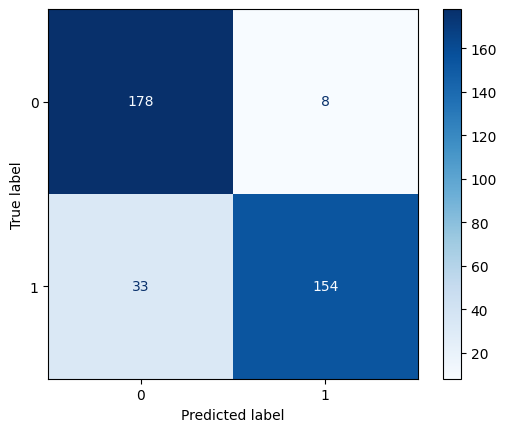

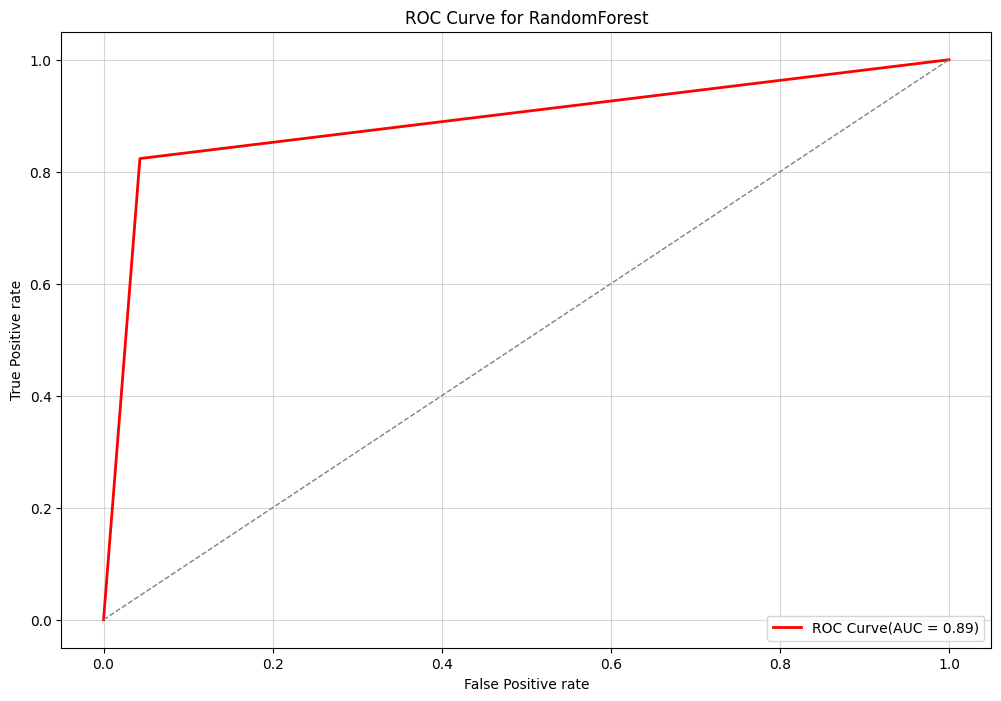

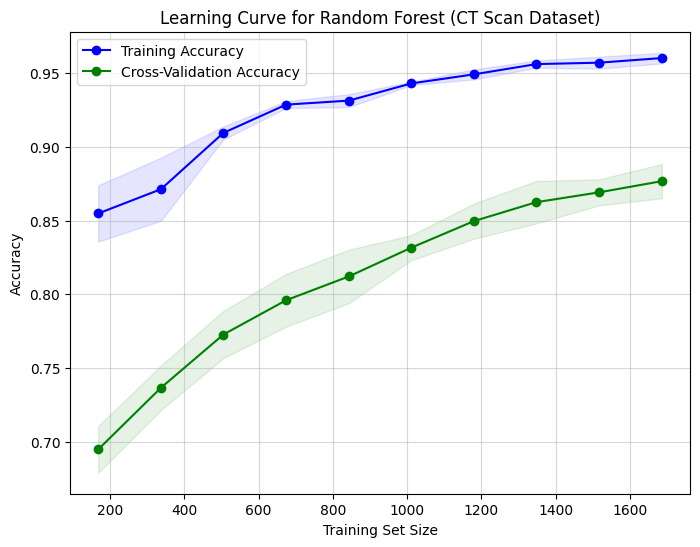

In [ ]:
k_Nearest_model = KNeighborsClassifier(n_neighbors= 2)
KN_scores = cross_val_score(k_Nearest_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{KN_scores}")
print(f"Mean accuracy:  {KN_scores.mean()}")
print(f"standard deiation : {KN_scores.std()}")
print()
k_Nearest_model.fit(x_train_m, y_train_m)
k_Nearest_prediction = k_Nearest_model.predict(x_test_m)
print(f"Acuuracy of the KNeighbors model : {accuracy_score(y_test_m, k_Nearest_prediction)}")
print(f"Classification report for KNeighbors model: {classification_report(y_test_m, k_Nearest_prediction)}")
print()
cm_KN = confusion_matrix(y_test_m, k_Nearest_prediction)
display_matrix_KN = ConfusionMatrixDisplay(confusion_matrix= cm_KN)
display_matrix_KN.plot(cmap="Blues")
print()
fpr_KN, tpr_KN, thresholds_KN = roc_curve(y_test_m, k_Nearest_prediction)
auc_score_KN = auc(fpr_KN, tpr_KN)

plt.figure(figsize=(12, 8))
plt.plot(fpr_KN, tpr_KN, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_KN:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve KNeighbors.png', format= 'png')
plt.show()
print()
train_sizes_KN, train_scores_KN, test_scores_KN =learning_curve(k_Nearest_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_KN = np.mean(train_scores_KN, axis= 1)
train_std_KN = np.std(train_scores_KN, axis = 1)
test_mean_KN = np.mean(test_scores_KN, axis = 1)
test_std_KN = np.std(test_scores_KN, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_KN, train_mean_KN, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_KN, train_mean_KN - train_std_KN, train_mean_KN + train_std_KN, color="blue", alpha=0.1)

plt.plot(train_sizes_KN, test_mean_KN, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_KN, test_mean_KN - test_std_KN, test_mean_KN + test_std_KN, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve KNeighbors.png', format= 'png')
plt.show()



## Machine learning DecisionTree Model

Cross validation scores:[0.65191147 0.79233871 0.7983871  0.73991935 0.65725806]
Mean accuracy:  0.7279629389238658
standard deiation : 0.0632925953356743

Acuuracy of the DecisionTree model : 0.9812332439678284
Classification report for DecisionTree model:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       186
           1       1.00      0.96      0.98       187

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373





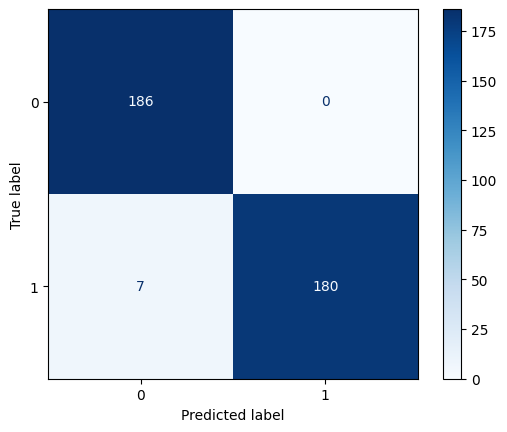

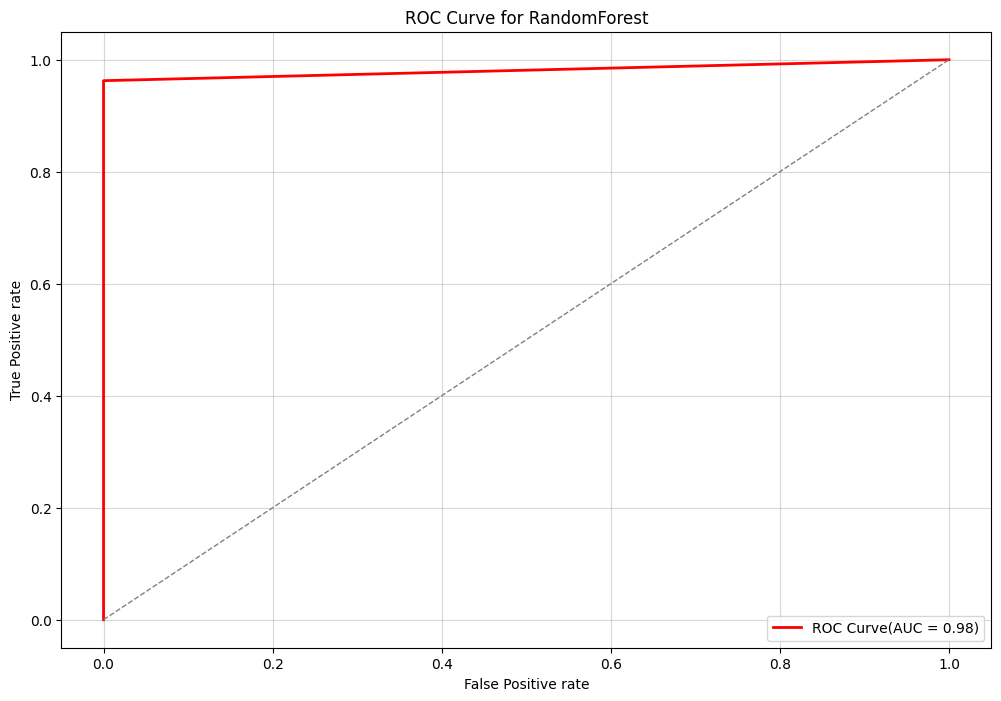

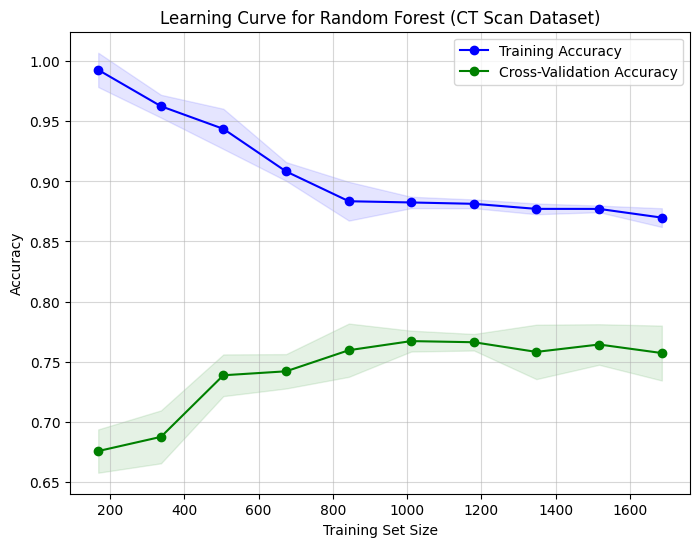

In [ ]:
Decisiontree_model = DecisionTreeClassifier(random_state= 42, max_depth= 5)
DecisionTree_scores = cross_val_score(Decisiontree_model, X, Y, cv=5, scoring='accuracy')
print(f"Cross validation scores:{DecisionTree_scores}")
print(f"Mean accuracy:  {DecisionTree_scores.mean()}")
print(f"standard deiation : {DecisionTree_scores.std()}")
print()
Decisiontree_model.fit(x_test_m, y_test_m)
Decisiontree_prediction = Decisiontree_model.predict(x_test_m)
print(f"Acuuracy of the DecisionTree model : {accuracy_score(y_test_m, Decisiontree_prediction)}")
print(f"Classification report for DecisionTree model: {classification_report(y_test_m, Decisiontree_prediction)}")
print()
cm_Decision = confusion_matrix(y_test_m, Decisiontree_prediction, labels= Decisiontree_model.classes_)
display_matrix_Decision = ConfusionMatrixDisplay(confusion_matrix= cm_Decision)
display_matrix_Decision.plot(cmap="Blues")
print()
fpr_Decosion, tpr_Decision, thresholds_Decision = roc_curve(y_test_m, Decisiontree_prediction)
auc_score_Decision = auc(fpr_Decosion, tpr_Decision)

plt.figure(figsize=(12, 8))
plt.plot(fpr_Decosion, tpr_Decision, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_Decision:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\ROC Curve DecisionTree.png', format= 'png')
plt.show()
print()
train_sizes_Decision, train_scores_Decision, test_scores_Decision =learning_curve(Decisiontree_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_Decision = np.mean(train_scores_Decision, axis= 1)
train_std_Decision = np.std(train_scores_Decision, axis = 1)
test_mean_Decision = np.mean(test_scores_Decision, axis = 1)
test_std_Decision = np.std(test_scores_Decision, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_Decision, train_mean_Decision, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_Decision, train_mean_Decision - train_std_Decision, train_mean_Decision + train_std_Decision, color="blue", alpha=0.1)

plt.plot(train_sizes_Decision, test_mean_Decision, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_Decision, test_mean_Decision - test_std_Decision, test_mean_Decision + test_std_Decision, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve DecisionTree.png', format= 'png')
plt.show()

## Machine learning Gradient Boosting Model

Cross validation scores:[0.75855131 0.89112903 0.91733871 0.83467742 0.74798387]
Mean accuracy:  0.8299360680210294
standard deiation : 0.06814429930677074

Acuuracy of the Gradiant Boosting Machines model : 0.9222520107238605
Classification report for Gradiant Boosting Machines model 
:               precision    recall  f1-score   support

           0       0.91      0.94      0.92       186
           1       0.94      0.90      0.92       187

    accuracy                           0.92       373
   macro avg       0.92      0.92      0.92       373
weighted avg       0.92      0.92      0.92       373





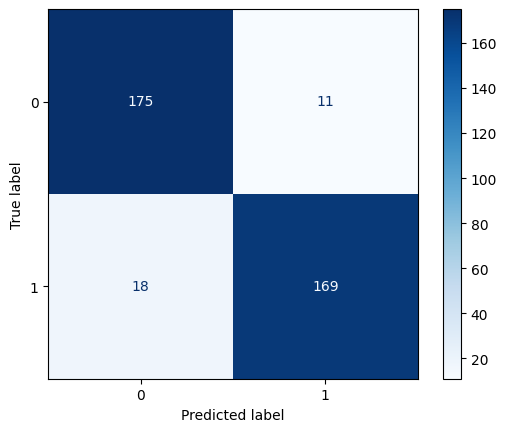

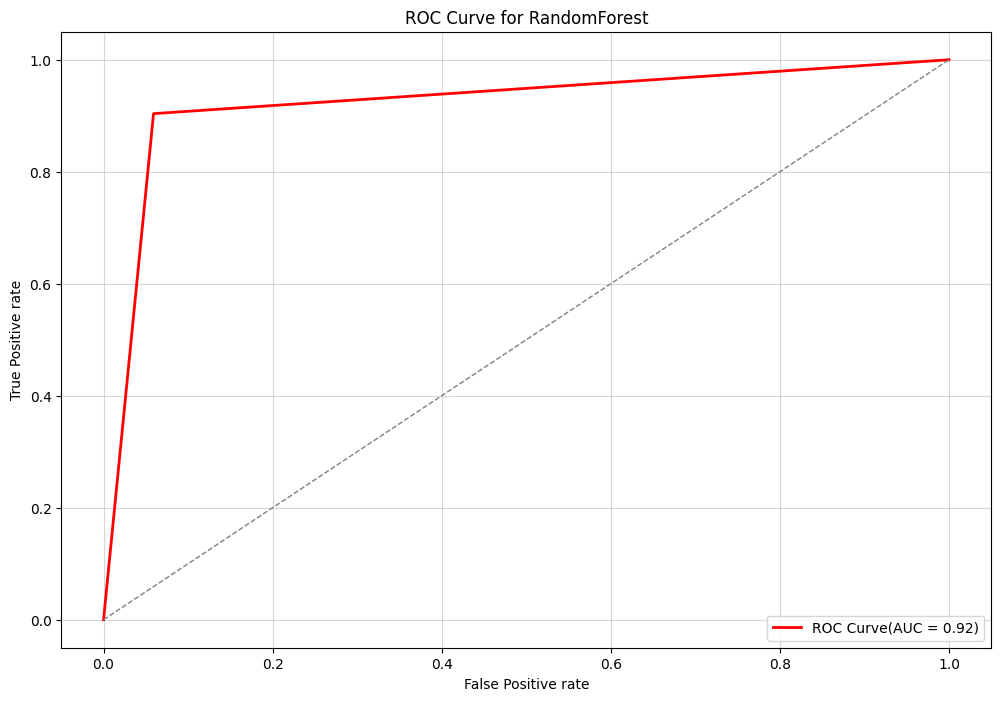

In [ ]:
GBM_model = GradientBoostingClassifier(random_state= 42)
GBM_scores = cross_val_score(GBM_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{GBM_scores}")
print(f"Mean accuracy:  {GBM_scores.mean()}")
print(f"standard deiation : {GBM_scores.std()}")
print()
GBM_model.fit(x_train_m, y_train_m)
GBM_prediction = GBM_model.predict(x_test_m)
print(f"Acuuracy of the Gradiant Boosting Machines model : {accuracy_score(y_test_m, GBM_prediction)}")
print(f"Classification report for Gradiant Boosting Machines model \n: {classification_report(y_test_m, GBM_prediction)}")
print()
cm_GBM = confusion_matrix(y_test_m, GBM_prediction, labels= GBM_model.classes_)
display_matrix_GBM = ConfusionMatrixDisplay(confusion_matrix= cm_GBM)
display_matrix_GBM.plot(cmap="Blues")
print()
fpr_GBM, tpr_GBM, thresholds_GBM = roc_curve(y_test_m, GBM_prediction)
auc_score_GBM = auc(fpr_GBM, tpr_GBM)

plt.figure(figsize=(12, 8))
plt.plot(fpr_GBM, tpr_GBM, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_GBM:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\ROC Curve GBM.png', format= 'png')
plt.show()

## Machine learning XGBoost Model

Cross validation scores:[0.75452716 0.88508065 0.90927419 0.85483871 0.71774194]
Mean accuracy:  0.824292529369767
standard deiation : 0.07492714168400152

Acuuracy of the Gradiant Boosting Machines model : 0.935656836461126
Classification report for Gradiant Boosting Machines model 
:               precision    recall  f1-score   support

           0       0.92      0.96      0.94       186
           1       0.96      0.91      0.93       187

    accuracy                           0.94       373
   macro avg       0.94      0.94      0.94       373
weighted avg       0.94      0.94      0.94       373





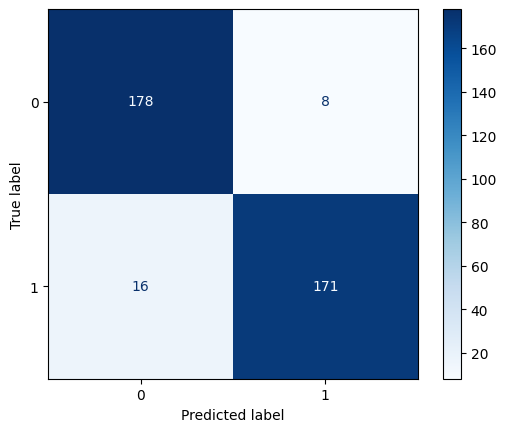

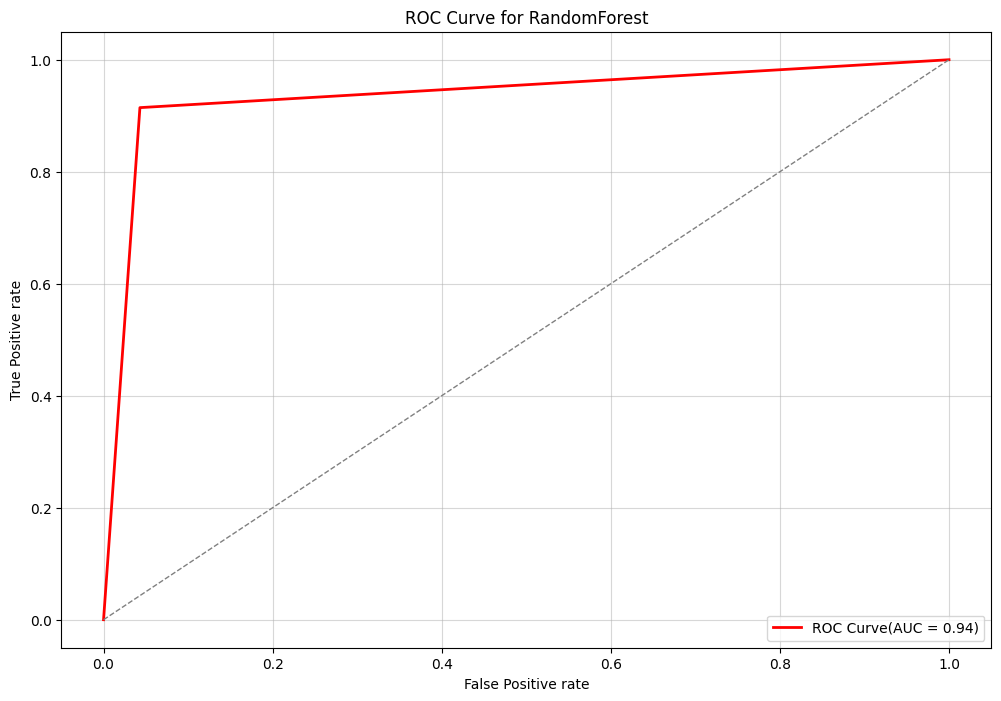

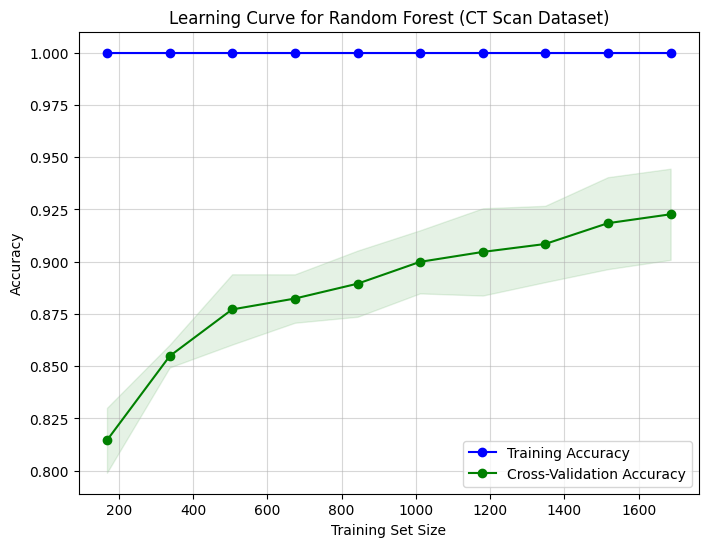

In [ ]:
XGB_model = XGBClassifier()
XGB_scores = cross_val_score(XGB_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{XGB_scores}")
print(f"Mean accuracy:  {XGB_scores.mean()}")
print(f"standard deiation : {XGB_scores.std()}")
print()
XGB_model.fit(x_train_m, y_train_m)
XGB_prediction = XGB_model.predict(x_test_m)
print(f"Acuuracy of the Gradiant Boosting Machines model : {accuracy_score(y_test_m, XGB_prediction)}")
print(f"Classification report for Gradiant Boosting Machines model \n: {classification_report(y_test_m, XGB_prediction)}")
print()
cm_XGB = confusion_matrix(y_test_m, XGB_prediction, labels= XGB_model.classes_)
display_matrix_XGB = ConfusionMatrixDisplay(confusion_matrix= cm_XGB)
display_matrix_XGB.plot(cmap="Blues")
print()
fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test_m, XGB_prediction)
auc_score_XGB = auc(fpr_XGB, tpr_XGB)

plt.figure(figsize=(12, 8))
plt.plot(fpr_XGB, tpr_XGB, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_XGB:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\ROC Curve XGB.png', format= 'png')
plt.show()
print()
train_sizes_XGB, train_scores_XGB, test_scores_XGB =learning_curve(XGB_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_XGB = np.mean(train_scores_XGB, axis= 1)
train_std_XGB = np.std(train_scores_XGB, axis = 1)
test_mean_XGB = np.mean(test_scores_XGB, axis = 1)
test_std_XGB = np.std(test_scores_XGB, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_XGB, train_mean_XGB, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_XGB, train_mean_XGB - train_std_XGB, train_mean_XGB + train_std_XGB, color="blue", alpha=0.1)

plt.plot(train_sizes_XGB, test_mean_XGB, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_XGB, test_mean_XGB - test_std_XGB, test_mean_XGB + test_std_XGB, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Learning Curve XGB.png', format= 'png')
plt.show()



## Machine learning Light GBM Model

[LightGBM] [Info] Number of positive: 1001, number of negative: 983
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 531032
[LightGBM] [Info] Number of data points in the train set: 1984, number of used features: 4096
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504536 -> initscore=0.018146
[LightGBM] [Info] Start training from score 0.018146
[LightGBM] [Info] Number of positive: 1001, number of negative: 984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528647
[LightGBM] [Info] Number of data points in the train set: 1985, number of used features: 4096
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504282 -> initscore=0.017129
[LightGBM] [Info] Start training from score 0.017129
[LightGBM] [Info

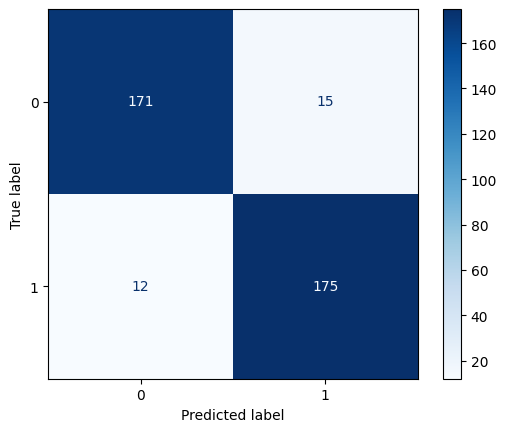

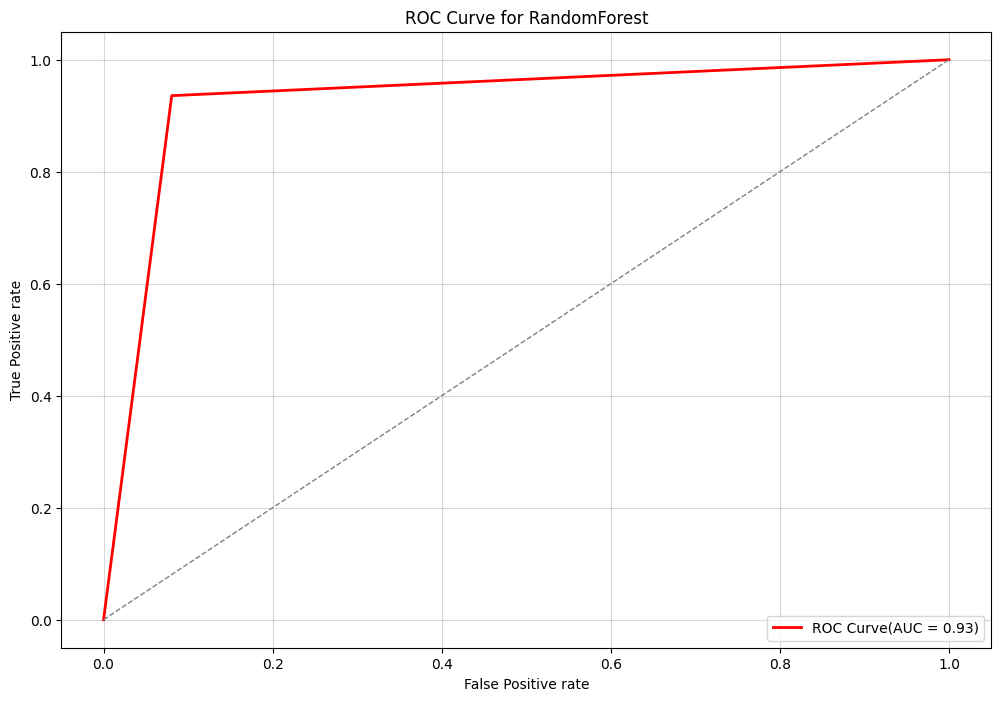


[LightGBM] [Info] Number of positive: 93, number of negative: 75
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166642
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 4096
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553571 -> initscore=0.215111
[LightGBM] [Info] Start training from score 0.215111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

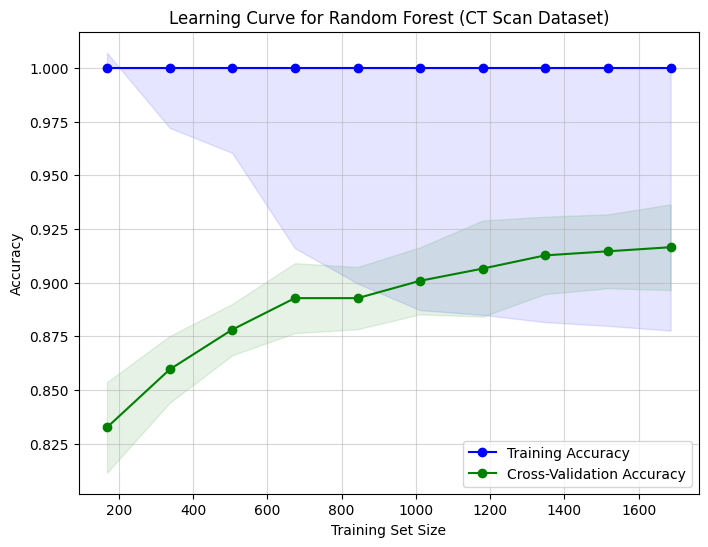

In [13]:
lightgbm_model = LGBMClassifier(random_state= 42)
lightgbm_scores = cross_val_score(lightgbm_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{lightgbm_scores}")
print(f"Mean accuracy:  {lightgbm_scores.mean()}")
print(f"standard deiation : {lightgbm_scores.std()}")
print()
lightgbm_model.fit(x_train_m, y_train_m)
lightgbm_prediction = lightgbm_model.predict(x_test_m)
print(f"Acuuracy of the LightGBM model model : {accuracy_score(y_test_m, lightgbm_prediction)}")
print(f"Classification report for LightGBM model:\n {classification_report(y_test_m, lightgbm_prediction)}")
print()
cm_light = confusion_matrix(y_test_m, lightgbm_prediction, labels= lightgbm_model.classes_)
display_matrix_light = ConfusionMatrixDisplay(confusion_matrix= cm_light)
display_matrix_light.plot(cmap="Blues")
print()
fpr_light, tpr_light, thresholds_light = roc_curve(y_test_m, lightgbm_prediction)
auc_score_light = auc(fpr_light, tpr_light)

plt.figure(figsize=(12, 8))
plt.plot(fpr_light, tpr_light, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_light:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Roc Curve Light.png', format= 'png')
plt.show()
print()
train_sizes_light, train_scores_light, test_scores_light =learning_curve(lightgbm_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_light = np.mean(train_scores_light, axis= 1)
train_std_light = np.std(train_scores_light, axis = 1)
test_mean_light = np.mean(test_scores_light, axis = 1)
test_std_light = np.std(test_scores_light, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_light, train_mean_light, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_light, train_mean_light - train_std_light, train_mean_Decision + train_std_Decision, color="blue", alpha=0.1)

plt.plot(train_sizes_light, test_mean_light, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_light, test_mean_light - test_std_light, test_mean_light + test_std_light, color="green", alpha=0.1)

plt.title("Learning Curve for Random Forest (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning Curve light.png', format= 'png')
plt.show()

## Machine learning AdaBoost Model

C:\Users\Ali khatami\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ali khatami\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ali khatami\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ali khatami\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

Cross validation scores:[0.74245473 0.83467742 0.88306452 0.8125     0.68951613]
Mean accuracy:  0.7924425585772701
standard deiation : 0.06854349958899572



C:\Users\Ali khatami\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acuuracy of the Ada boost model : 0.8900804289544236
Classification report for Adaboost model:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       186
           1       0.88      0.90      0.89       187

    accuracy                           0.89       373
   macro avg       0.89      0.89      0.89       373
weighted avg       0.89      0.89      0.89       373





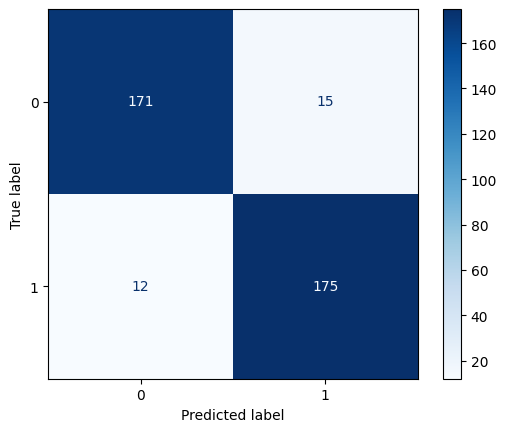

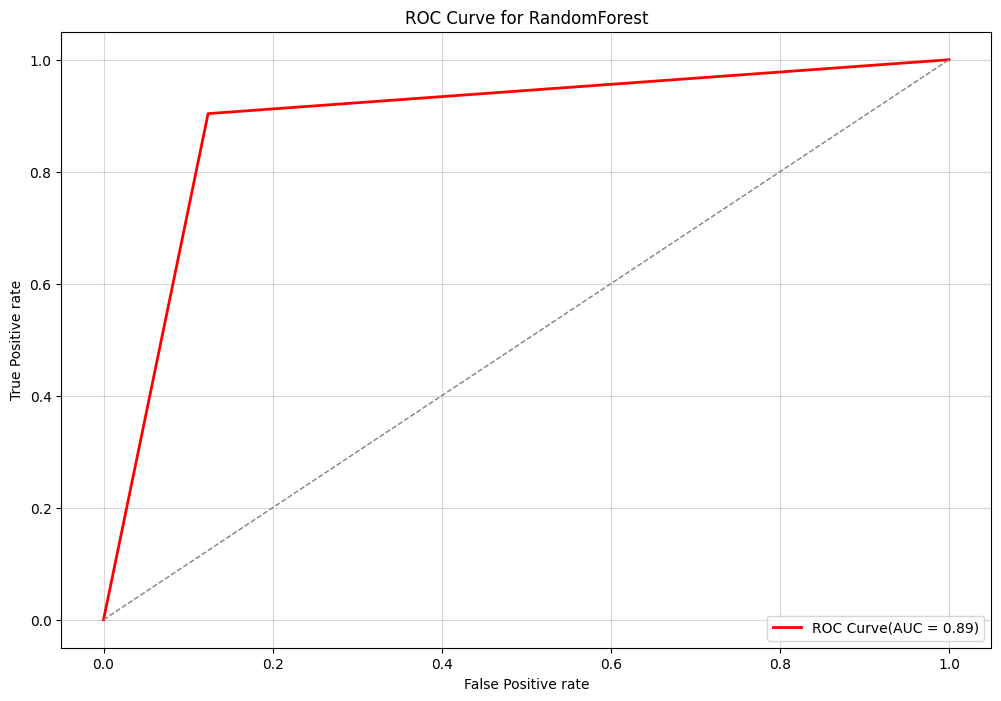


[LightGBM] [Info] Number of positive: 93, number of negative: 75
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166642
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 4096
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553571 -> initscore=0.215111
[LightGBM] [Info] Start training from score 0.215111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

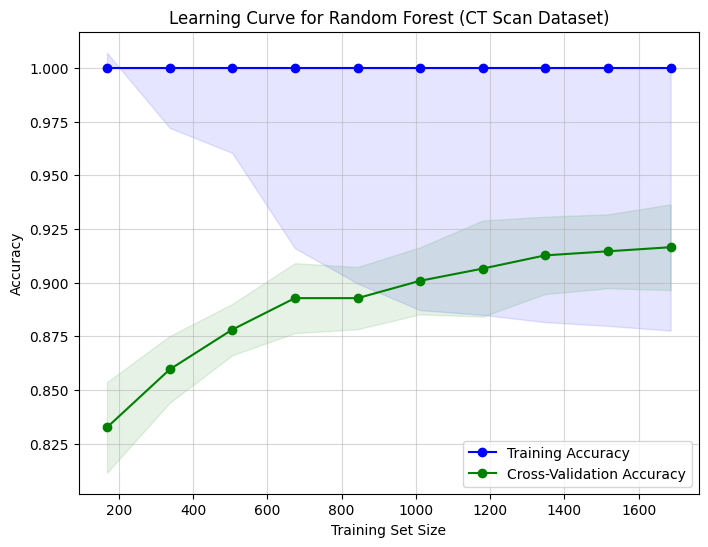

In [ ]:
adaboost_model = AdaBoostClassifier(random_state= 42)
Ada_scores = cross_val_score(adaboost_model, X, Y, cv =5, scoring = 'accuracy')
print(f"Cross validation scores:{Ada_scores}")
print(f"Mean accuracy:  {Ada_scores.mean()}")
print(f"standard deiation : {Ada_scores.std()}")
print()
adaboost_model.fit(x_train_m, y_train_m)
adaboost_prediction = adaboost_model.predict(x_test_m)
print(f"Acuuracy of the Ada boost model : {accuracy_score(y_test_m, adaboost_prediction)}")
print(f"Classification report for Adaboost model:\n {classification_report(y_test_m, adaboost_prediction)}")

print()
cm_Ada = confusion_matrix(y_test_m, adaboost_prediction, labels= adaboost_model.classes_)
display_matrix_ada = ConfusionMatrixDisplay(confusion_matrix= cm_light)
display_matrix_ada.plot(cmap="Blues")
print()
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test_m, adaboost_prediction)
auc_score_ada = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(12, 8))
plt.plot(fpr_ada, tpr_ada, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_ada:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Roc Curve ada.png', format= 'png')
plt.show()
print()
train_sizes_light, train_scores_light, test_scores_light =learning_curve(lightgbm_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_light = np.mean(train_scores_light, axis= 1)
train_std_light = np.std(train_scores_light, axis = 1)
test_mean_light = np.mean(test_scores_light, axis = 1)
test_std_light = np.std(test_scores_light, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_light, train_mean_light, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes_light, train_mean_light - train_std_light, train_mean_Decision + train_std_Decision, color="blue", alpha=0.1)

plt.plot(train_sizes_light, test_mean_light, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes_light, test_mean_light - test_std_light, test_mean_light + test_std_light, color="green", alpha=0.1)

plt.title("Learning Curve for adaboost (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning Curve ada.png', format= 'png')
plt.show()

## Machine learning Naivebayes Model

Cross validation scores:[0.73239437 0.60080645 0.72580645 0.71975806 0.74193548]
Mean accuracy:  0.7041401635620174
standard deiation : 0.0521881003622551

Acuuracy of the Naive bayes model : 0.7238605898123325
Classification report for Naive bayes model:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       186
           1       0.83      0.56      0.67       187

    accuracy                           0.72       373
   macro avg       0.75      0.72      0.72       373
weighted avg       0.75      0.72      0.72       373




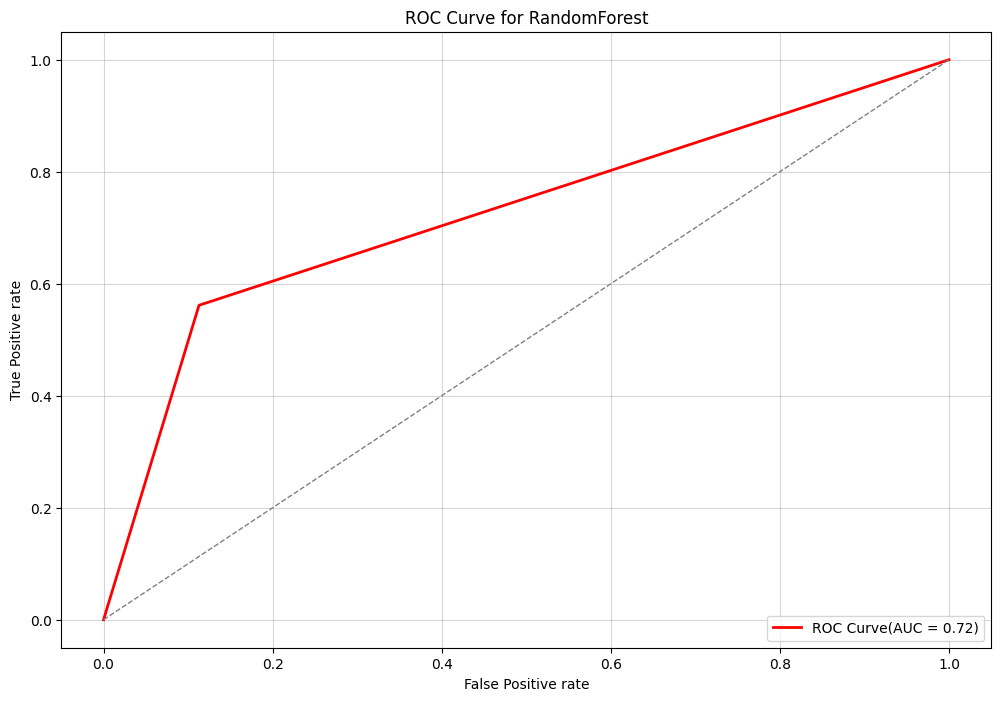

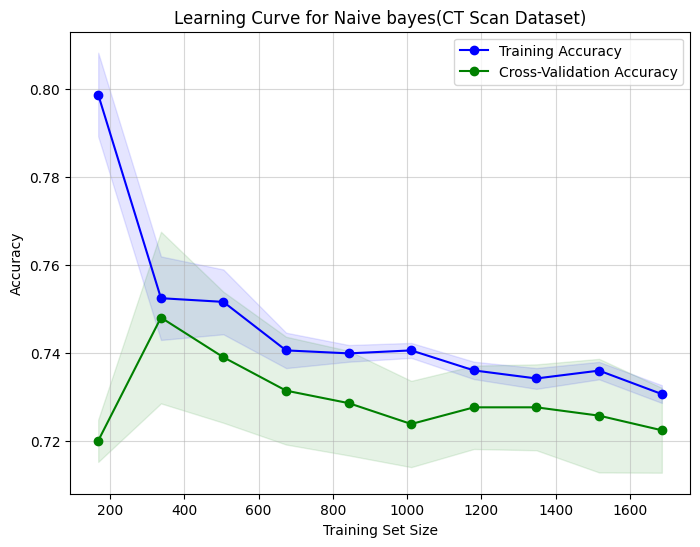

In [ ]:
Naivebayes_model = GaussianNB()
Naive_scores = cross_val_score(Naivebayes_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{Naive_scores}")
print(f"Mean accuracy:  {Naive_scores.mean()}")
print(f"standard deiation : {Naive_scores.std()}")
print()
Naivebayes_model.fit(x_train_m, y_train_m)
Naivebayes_prediction = Naivebayes_model.predict(x_test_m)
print(f"Acuuracy of the Naive bayes model : {accuracy_score(y_test_m, Naivebayes_prediction)}")
print(f"Classification report for Naive bayes model:\n {classification_report(y_test_m, Naivebayes_prediction)}")



print()
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test_m, Naivebayes_prediction)
auc_score_NB = auc(fpr_NB, tpr_NB)

plt.figure(figsize=(12, 8))
plt.plot(fpr_NB, tpr_NB, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_NB:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Roc Curve Naive.png', format= 'png')
plt.show()
print()
train_sizes, train_scores, test_scores =learning_curve(Naivebayes_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_NB = np.mean(train_scores, axis= 1)
train_std_NB = np.std(train_scores, axis = 1)
test_mean_NB = np.mean(test_scores, axis = 1)
test_std_NB = np.std(test_scores, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean_NB, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean_NB - train_std_NB, train_mean_NB + train_std_NB, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean_NB, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean_NB - test_std_NB, test_mean_NB + test_std_NB, color="green", alpha=0.1)

plt.title("Learning Curve for Naive bayes(CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning curve Naive.png', format= 'png')
plt.show()

## Machine learning ExtraTree Model

Cross validation scores:[0.79879276 0.86895161 0.89112903 0.78024194 0.72379032]
Mean accuracy:  0.8125811319530083
standard deiation : 0.060773603675793014

Acuuracy of the Extra tree  model : 0.9249329758713136
Classification report for Extra tree model:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       186
           1       0.93      0.92      0.92       187

    accuracy                           0.92       373
   macro avg       0.92      0.92      0.92       373
weighted avg       0.92      0.92      0.92       373




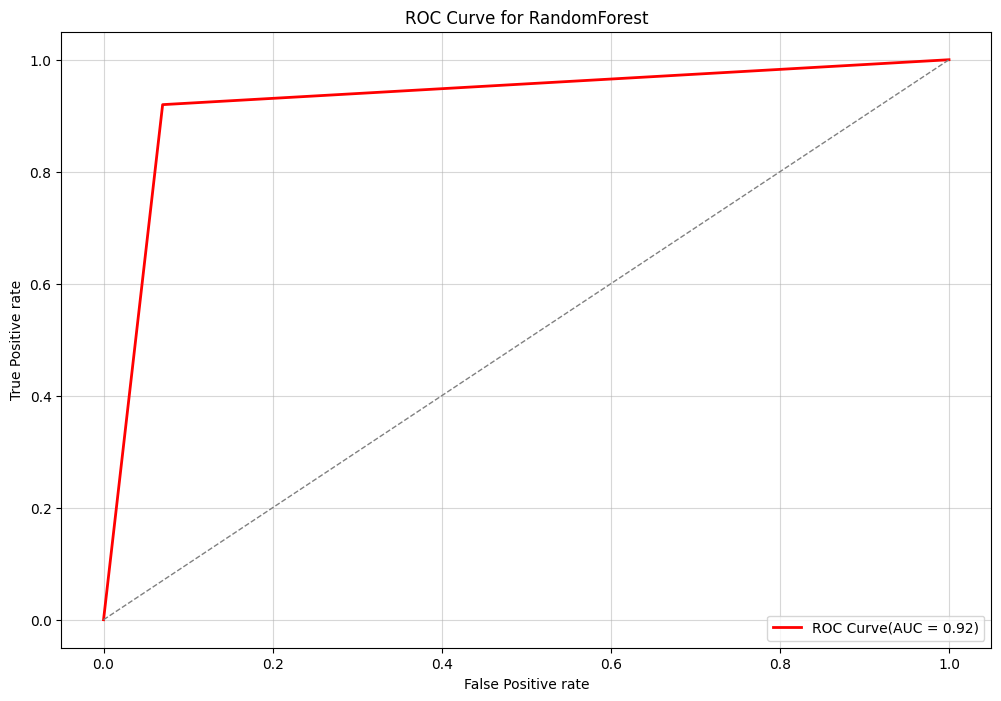

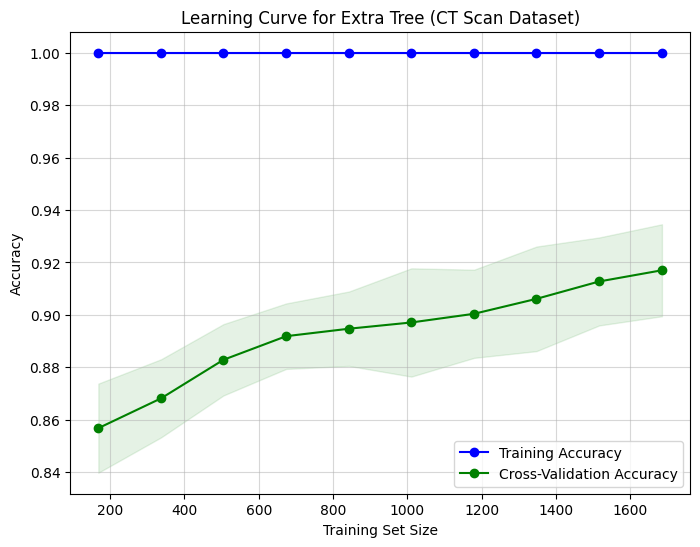

In [ ]:
Extratress_model = ExtraTreesClassifier(random_state= 42)
Extra_scores = cross_val_score(Extratress_model,X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{Extra_scores}")
print(f"Mean accuracy:  {Extra_scores.mean()}")
print(f"standard deiation : {Extra_scores.std()}")
print()
Extratress_model.fit(x_train_m, y_train_m)
Extratress_prediction = Extratress_model.predict(x_test_m)
print(f"Acuuracy of the Extra tree  model : {accuracy_score(y_test_m, Extratress_prediction)}")
print(f"Classification report for Extra tree model:\n {classification_report(y_test_m, Extratress_prediction)}")



print()
fpr_extra, tpr_extra, thresholds_LDA = roc_curve(y_test_m, Extratress_prediction)
auc_score_extra = auc(fpr_extra, tpr_extra)

plt.figure(figsize=(12, 8))
plt.plot(fpr_extra, tpr_extra, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_extra:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Roc Curve Extra.png', format= 'png')
plt.show()
print()
train_sizes, train_scores, test_scores =learning_curve(Extratress_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_extra = np.mean(train_scores, axis= 1)
train_std_extra = np.std(train_scores, axis = 1)
test_mean_extra = np.mean(test_scores, axis = 1)
test_std_extra = np.std(test_scores, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean_extra, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean_extra - train_std_extra, train_mean_extra + train_std_extra, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean_extra, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean_extra - test_std_extra, test_mean_extra + test_std_extra, color="green", alpha=0.1)

plt.title("Learning Curve for Extra Tree (CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning curve Extra.png', format= 'png')
plt.show()

## Machine learning Linear Discriminant Model

Cross validation scores:[0.65995976 0.65524194 0.60080645 0.64112903 0.68346774]
Mean accuracy:  0.6481209839683262
standard deiation : 0.027304981939687174

Acuuracy of the LDA model : 0.7131367292225201
Classification report for LDA model:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       186
           1       0.72      0.70      0.71       187

    accuracy                           0.71       373
   macro avg       0.71      0.71      0.71       373
weighted avg       0.71      0.71      0.71       373





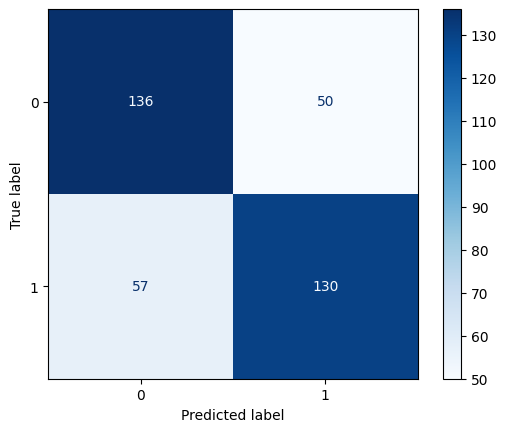

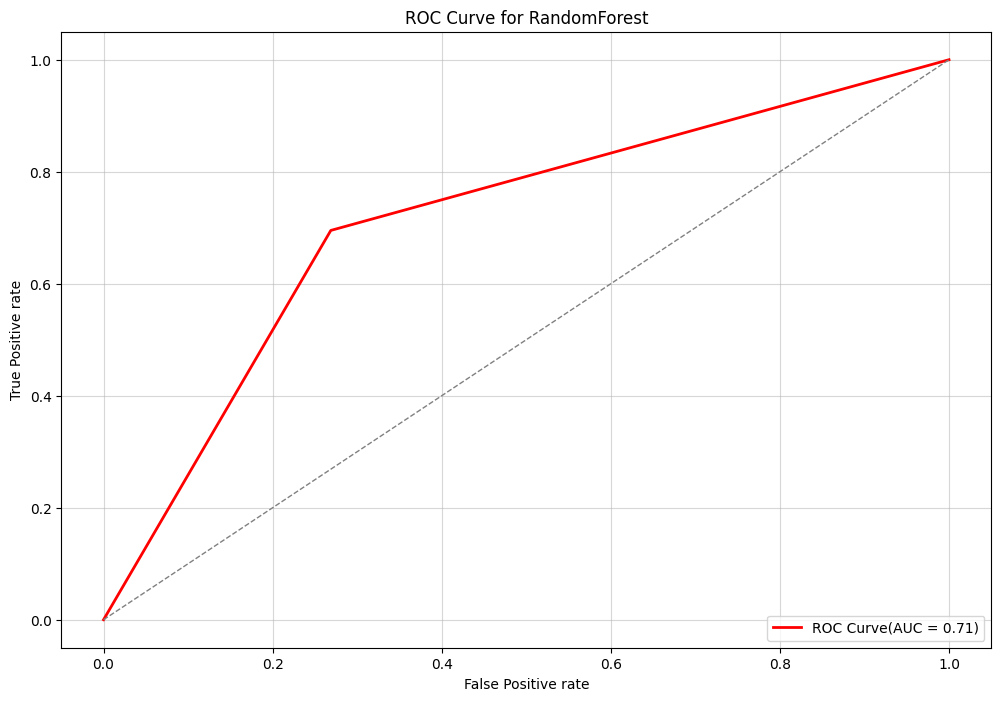

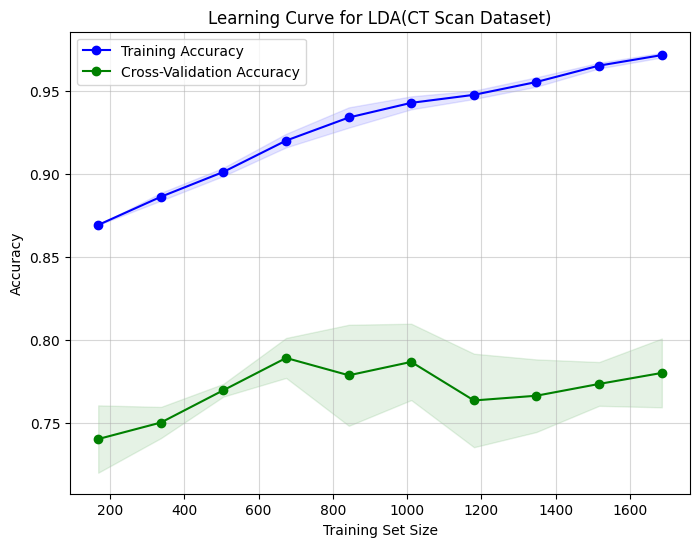

In [ ]:
LDA_model = LinearDiscriminantAnalysis()
Lda_scores = cross_val_score(LDA_model, X, Y, cv=5, scoring = 'accuracy')
print(f"Cross validation scores:{Lda_scores}")
print(f"Mean accuracy:  {Lda_scores.mean()}")
print(f"standard deiation : {Lda_scores.std()}")
print()
LDA_model.fit(x_train_m, y_train_m)
LDA_prediction = LDA_model.predict(x_test_m)
print(f"Acuuracy of the LDA model : {accuracy_score(y_test_m, LDA_prediction)}")
print(f"Classification report for LDA model:\n {classification_report(y_test_m, LDA_prediction)}")
reports = classification_report(y_test_m, LDA_prediction, output_dict=True)
print()
cm_LDA = confusion_matrix(y_test_m, LDA_prediction, labels= LDA_model.classes_)
display_matrix_LDA = ConfusionMatrixDisplay(confusion_matrix= cm_LDA)
display_matrix_LDA.plot(cmap="Blues")

print()
fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(y_test_m, LDA_prediction)
auc_score_LDa = auc(fpr_LDA, tpr_LDA)

plt.figure(figsize=(12, 8))
plt.plot(fpr_LDA, tpr_LDA, color = 'red', lw = 2, label = f'ROC Curve(AUC = {auc_score_LDa:.2f})')
plt.plot([0,1], [0,1], color = 'gray', linestyle = '--', lw =1)
plt.xlabel('False Positive rate')
plt.ylabel("True Positive rate")
plt.title("ROC Curve for RandomForest")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\Roc Curve LDA.png', format= 'png')
plt.show()
print()
train_sizes, train_scores, test_scores =learning_curve(LDA_model,
                                                       x_train_m, y_train_m, cv= 5, scoring='accuracy', 
                                                       train_sizes= np.linspace(0.1, 1.0, 10))
train_mean_LDA = np.mean(train_scores, axis= 1)
train_std_LDA = np.std(train_scores, axis = 1)
test_mean_LDA = np.mean(test_scores, axis = 1)
test_std_LDA = np.std(test_scores, axis= 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean_LDA, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean_LDA - train_std_LDA, train_mean_LDA + train_std_LDA, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean_LDA, label="Cross-Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean_LDA - test_std_LDA, test_mean_LDA + test_std_LDA, color="green", alpha=0.1)

plt.title("Learning Curve for LDA(CT Scan Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(alpha=0.5)
plt.savefig('Statistics\\learning curve LDA.png', format= 'png')
plt.show()

# Gathering Statistics

In [41]:
precision_RandomForest = classification_report(y_test_m, RandomForest_prediction, output_dict=True)
Precision.append(precision_RandomForest['weighted avg']['precision'])
Recall.append(precision_RandomForest['weighted avg']['recall'])
F1.append(precision_RandomForest['weighted avg']['f1-score'])


precision_SVM = classification_report(y_test_m, SVM_prediction, output_dict=True)
Precision.append(precision_SVM['weighted avg']['precision'])
Recall.append(precision_SVM['weighted avg']['recall'])
F1.append(precision_SVM['weighted avg']['f1-score'])


precision_logistic = classification_report(y_test_m, logistic_regression_prediction, output_dict=True)
Precision.append(precision_logistic['weighted avg']['precision'])
Recall.append(precision_logistic['weighted avg']['recall'])
F1.append(precision_logistic['weighted avg']['f1-score'])

precision_KN = classification_report(y_test_m, k_Nearest_prediction, output_dict=True)
Precision.append(precision_KN['weighted avg']['precision'])
Recall.append(precision_KN['weighted avg']['recall'])
F1.append(precision_KN['weighted avg']['f1-score'])

precision_Decision = classification_report(y_test_m, Decisiontree_prediction, output_dict=True)
Precision.append(precision_Decision['weighted avg']['precision'])
Recall.append(precision_Decision['weighted avg']['recall'])
F1.append(precision_Decision['weighted avg']['f1-score'])

precision_GBM = classification_report(y_test_m, GBM_prediction, output_dict=True)
Precision.append(precision_GBM['weighted avg']['precision'])
Recall.append(precision_GBM['weighted avg']['recall'])
F1.append(precision_GBM['weighted avg']['f1-score'])

precision_XGB = classification_report(y_test_m, XGB_prediction, output_dict=True)
Precision.append(precision_XGB['weighted avg']['precision'])
Recall.append(precision_XGB['weighted avg']['recall'])
F1.append(precision_XGB['weighted avg']['f1-score'])


precision_Ada = classification_report(y_test_m, adaboost_prediction, output_dict=True)
Precision.append(precision_Ada['weighted avg']['precision'])
Recall.append(precision_Ada['weighted avg']['recall'])
F1.append(precision_Ada['weighted avg']['f1-score'])

precision_Naive = classification_report(y_test_m, Naivebayes_prediction, output_dict=True)
Precision.append(precision_Naive['weighted avg']['precision'])
Recall.append(precision_Naive['weighted avg']['recall'])
F1.append(precision_Naive['weighted avg']['f1-score'])

precision_Extra = classification_report(y_test_m, Extratress_prediction, output_dict=True)
Precision.append(precision_Extra['weighted avg']['precision'])
Recall.append(precision_Extra['weighted avg']['recall'])
F1.append(precision_Extra['weighted avg']['f1-score'])

precision_LDA = classification_report(y_test_m, LDA_prediction, output_dict=True)
Precision.append(precision_LDA['weighted avg']['precision'])
Recall.append(precision_LDA['weighted avg']['recall'])
F1.append(precision_LDA['weighted avg']['f1-score'])

In [43]:
accuracies = [scores_random_forest.mean(), scores_SVM.mean(), Logistic_scores.mean(),
              KN_scores.mean(), DecisionTree_scores.mean(),GBM_scores.mean(), XGB_scores.mean(),
              Ada_scores.mean(),Naive_scores.mean(),Extra_scores.mean(),
              Lda_scores.mean()
            ]
percisions = []

In [44]:
AUC = []
AUC.append(auc_score)
AUC.append(auc_score_svm)
AUC.append(auc_score_logistic)
AUC.append(auc_score_KN)
AUC.append(auc_score_Decision)
AUC.append(auc_score_GBM)
AUC.append(auc_score_XGB)
AUC.append(auc_score_ada)
AUC.append(auc_score_NB)
AUC.append(auc_score_extra)
AUC.append(auc_score_LDa)

In [55]:
len(accuracies)

11

In [56]:
data_to_save = {
    "models" : ['Random Forest', 'SVM', 'Logistic regression', 'Kneighbors', 'DecisionTree', 'Gradiant Boost', 'XGBooat', 'Adaboost', 'Naivebayes', 'Extratrees', 'LDA'],
    "accuracy" : accuracies,
    "Precisions" : Precision,
    "Recall" : Recall,
    "F1-Score" : F1,
    "AUC score": AUC
}

In [57]:
for key in ['accuracy', 'Precisions', 'Recall', 'F1-Score', 'AUC score']:
    data_to_save[key] = [round(value, 2) for value in data_to_save[key]]

## Save data in CSV format

In [58]:
save_dataframe = pd.DataFrame(data_to_save)

In [59]:
save_dataframe.to_csv('Models Metrics.csv', index = False)

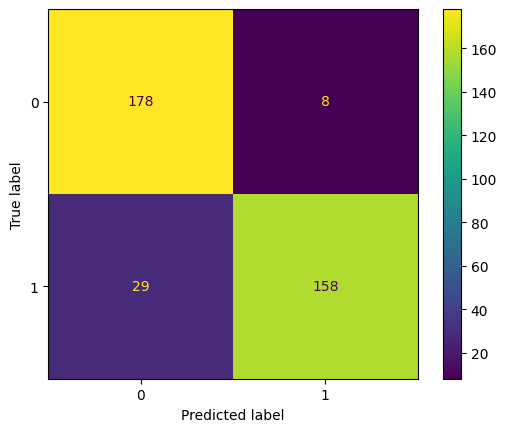

In [60]:
ConfusionMatrixDisplay.from_estimator(random_forest_model, x_test_m, y_test_m)

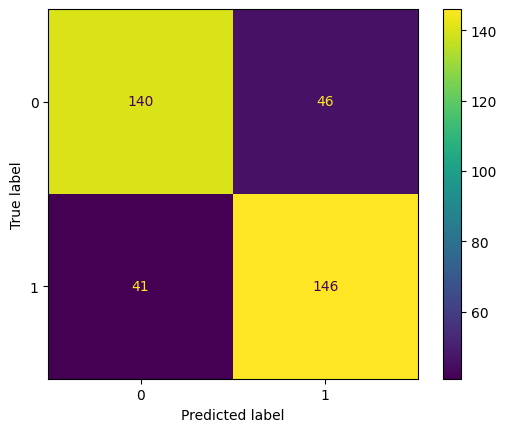

In [61]:
ConfusionMatrixDisplay.from_estimator(SVM_model, x_test_m, y_test_m)